# Exercicio 1

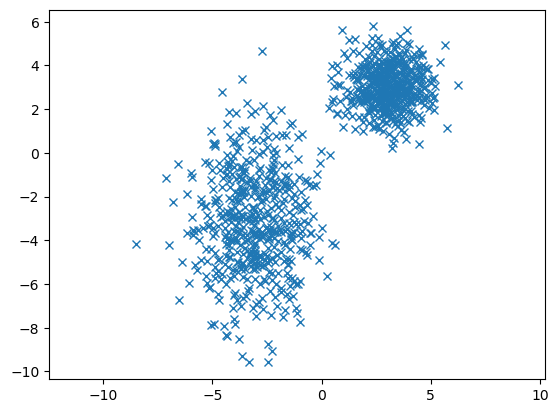

In [121]:
import matplotlib . pyplot as plt
import numpy as np
import random
mean = [ 3 , 3]
cov = [ [ 1 , 0] , [0 , 1 ] ]
a = np . random . multivariate_normal (mean, cov , 500).T
mean = [ -3 , -3]
cov = [ [ 2 , 0] , [0 , 5 ] ]
b = np . random . multivariate_normal (mean, cov , 500).T
c = np . concatenate ( ( a , b) , axis = 1 )
c = c . T
np . random . shuffle ( c )
c = c . T
x = c [0]
y = c [ 1 ]
plt . plot ( x , y , 'x' )
plt . axis (  'equal'  )
plt . show( )


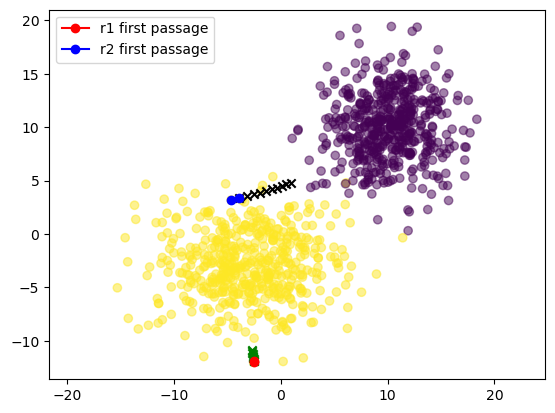

In [10]:
#Alinea a

import matplotlib.pyplot as plt
import numpy as np
import random


mean1 = [10,10]
cov1 = [[10, 0], [0, 10]]
a = np.random.multivariate_normal(mean1, cov1, 500)

mean2 = [-3,-3]
cov2 = [[20, 0], [0, 10]]
b = np.random.multivariate_normal(mean2, cov2, 500)

labels_a = np.ones((500, 1))
labels_b = np.full((500, 1), 2)
labeled_a = np.hstack((a, labels_a))
labeled_b = np.hstack((b, labels_b))
combined = np.vstack((labeled_a, labeled_b))

np.random.shuffle(combined)

x = combined[:, 0]
y = combined[:, 1]
labels = combined[:, 2]

r1 = combined[random.randint(0, 999), :2]
r2 = combined[random.randint(0, 999), :2]

alpha = 10e-5
r1_updates = [r1.copy()]
r2_updates = [r2.copy()]

for pass_num in range(10):
    for point in combined:
        if np.linalg.norm(point[:2] - r1) < np.linalg.norm(point[:2] - r2):
            r1 = (1 - alpha) * r1 + alpha * point[:2]
        else:
            r2 = (1 - alpha) * r2 + alpha * point[:2]

    r1_updates.append(r1.copy())  
    r2_updates.append(r2.copy()) 
            
plt.scatter(x, y, c=labels, alpha=0.5)
r1_updates = np.array(r1_updates)
r2_updates = np.array(r2_updates)

plt.plot(r1_updates[:2, 0], r1_updates[:2, 1], color='red', marker='o', label='r1 first passage')
plt.plot(r2_updates[:2, 0], r2_updates[:2, 1], color='blue', marker='o', label='r2 first passage')

for i in range(1, len(r1_updates)):
    plt.scatter(r1_updates[i, 0], r1_updates[i, 1], color='green', marker='x')
    plt.scatter(r2_updates[i, 0], r2_updates[i, 1], color='black', marker='x')


plt.axis('equal')
plt.legend()
plt.show()


Sim, existe uma relação entre os valores finais de r1 e r2, e os parâmetros usados para gerar o dataset. Isto porque, o valor da covariancia, define a densidade dos pontos, por isso, quanto mais espalhados estes estiverem mais dificil será ao r1 e r2 convergirem para os centroides, visto que serão mais afetados por outliers e pontos distantes do centroide.
A média também poderia afetar, já que, se as médias dos dois "sets" de pontos estiverem muito perto, isso poderá causar alguma ambiguidade na tarefa, porque os pontos dos 2 sets estão tão perto, que uma pequena mudança nas posições de r1 ou r2 pode causar instabilidade na descoberta do centroide.

[9.5726785  9.58960312 9.60571987 9.62126959 9.63602317 9.65140302
 9.6663282  9.68049518 9.69426578 9.70733821 9.72019905]


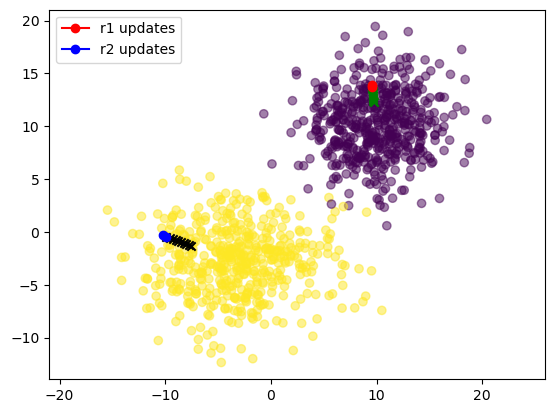

In [8]:
#Alinea b

#i)

r1 = combined[random.randint(0, 999), :2]
r2 = combined[random.randint(0, 999), :2]

alpha = 0.1
n_examples = len(combined)
r1_updates = [r1.copy()]
r2_updates = [r2.copy()]

for pass_num in range(10):
    d1 = np.zeros(2)
    d2 = np.zeros(2)
    
    for point in combined:
        if np.linalg.norm(point[:2] - r1) < np.linalg.norm(point[:2] - r2):
            d1 += (point[:2] - r1)
        else:
            d2 += (point[:2] - r2)

    
    r1 += (alpha / n_examples) * d1
    r2 += (alpha / n_examples) * d2
    r1_updates.append(r1.copy())
    r2_updates.append(r2.copy())

plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.5)
r1_updates = np.array(r1_updates)
r2_updates = np.array(r2_updates)


plt.plot(r1_updates[:2, 0], r1_updates[:2, 1], color='red', marker='o', label='r1 updates')
plt.plot(r2_updates[:2, 0], r2_updates[:2, 1], color='blue', marker='o', label='r2 updates')

for i in range(1, len(r1_updates)):
    plt.scatter(r1_updates[i, 0], r1_updates[i, 1], color='green', marker='x')
    plt.scatter(r2_updates[i, 0], r2_updates[i, 1], color='black', marker='x')
    
print(r1_updates[:,0])

plt.axis('equal')
plt.legend()
plt.show()


Normalmente o método de acumulação seria mais suave, e teria menos tendência a ser menos influencido por outliers, enquanto o de adaptação apesar de poder ser mais rápido, teria um caminho mais instável e menos direto.
Mas visto que temos uma taxa de aprendizgem muito pequena, e os dados devido à covariancia estão relativamento densos, pode-se observar que no exercicio a) o r1 e r2 conseguem aprender depressa e definir os seus caminhos até aos centroides, enquanto o de acumulação com este baixo numero de iterações, tem uma aprendizagem demasiado lenta para este exemplo em especifico.

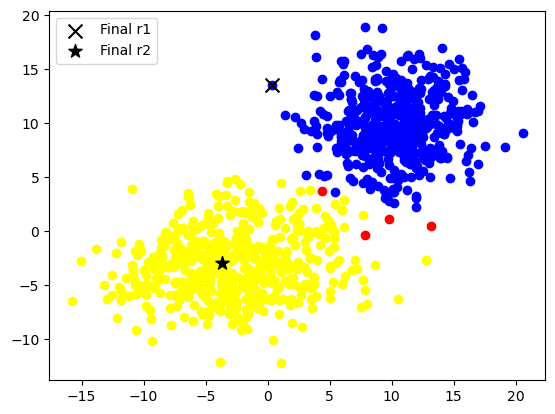

In [443]:
#ii)

final_r1 = r1_updates[-1]
final_r2 = r2_updates[-1]

colors = {('r1', 1): 'blue', ('r1', 2): 'green', ('r2', 1): 'red', ('r2', 2): 'yellow'}
for point in combined:
    x, y, original_label = point
    distance_to_r1 = np.linalg.norm([x, y] - final_r1)
    distance_to_r2 = np.linalg.norm([x, y] - final_r2)
    closer_to_r1 = distance_to_r1 < distance_to_r2
    label_key = ('r1', original_label) if closer_to_r1 else ('r2', original_label)
    plt.scatter(x, y, color=colors[label_key])

plt.scatter(final_r1[0], final_r1[1], color='black', marker='x', s=100, label='Final r1')
plt.scatter(final_r2[0], final_r2[1], color='black', marker='*', s=100, label='Final r2')

plt.legend()
plt.show()

Correndo este exercicio, podemos observar, que neste exemplo, a maioria dos pontos estão distribuidos em apenas 2 cores, com pequenas variações das restantes, estes casos são os que funcionam. Esta é a situação ideal, ou seja, o r1 e r2, começaram aleatoriamente cada um mais perto de um diferente set, procurando assim centroides diferentes, neste caso as 2 cores menos identificadas representariam outliers.

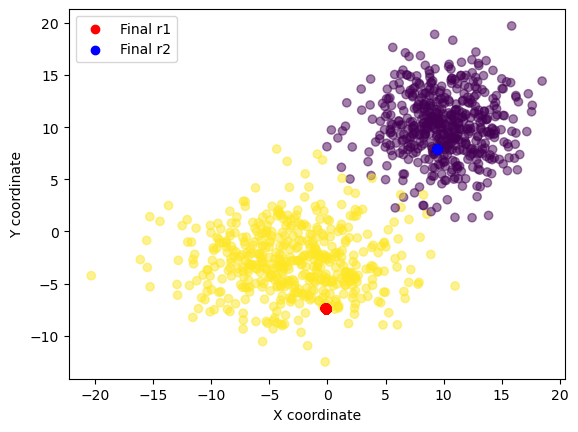

In [450]:
#iii)

final_r1_values = []
final_r2_values = []

r1 = combined[random.randint(0, 999), :2]
r2 = combined[random.randint(0, 999), :2]
alpha = 10e-5
n_examples = combined.shape[0]


for experiment in range(30):
    
    for pass_num in range(10): 
        d1 = np.zeros(2)
        d2 = np.zeros(2)
        
        for point in combined:
            if np.linalg.norm(point[:2] - r1) < np.linalg.norm(point[:2] - r2):
                d1 += (point[:2] - r1)
            else:
                d2 += (point[:2] - r2)
        
        r1 += (alpha / n_examples) * d1
        r2 += (alpha / n_examples) * d2
        
        final_r1_values.append(r1.copy())
        final_r2_values.append(r2.copy())

final_r1_values = np.array(final_r1_values)
final_r2_values = np.array(final_r2_values)



x = combined[:, 0]
y = combined[:, 1]

plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.5)


plt.scatter(final_r1_values[:, 0], final_r1_values[:, 1], color='red', label='Final r1')
plt.scatter(final_r2_values[:, 0], final_r2_values[:, 1], color='blue', label='Final r2')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()

plt.show()
    
    
    

Pode-se concluir que, mesmo com esta quantidade de experiências, a taxa de aprendizagem é demasiado baixa, e por isso o r1 e o r2 continuam a ter uma aprendizagem e aproximação aos centroides demasiado lenta. Testando com uma taxa de aprendizagem de por exemplo, 0.1 poderia-se ver que nesse caso já chegariam adequadamente aos respetivos centroides.

# Exercicio 2

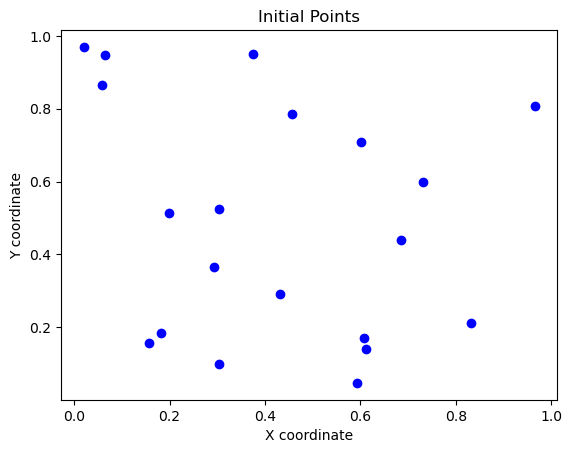

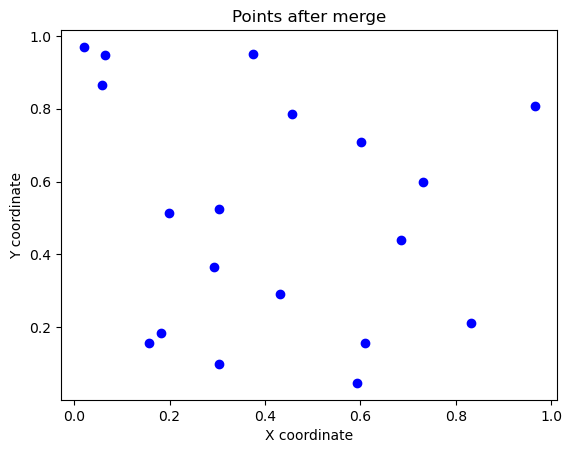

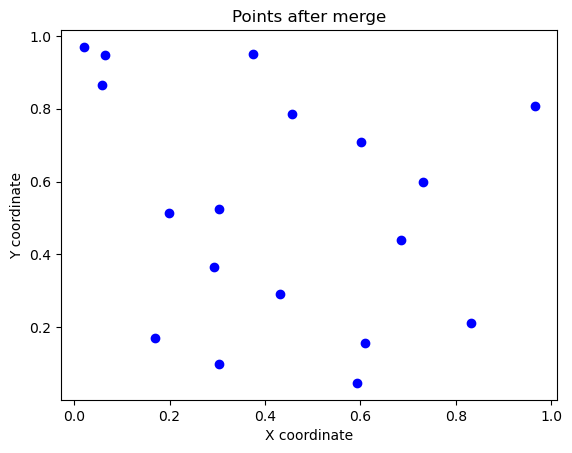

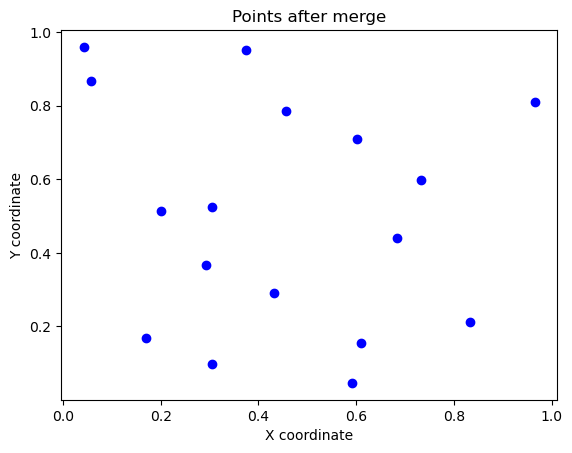

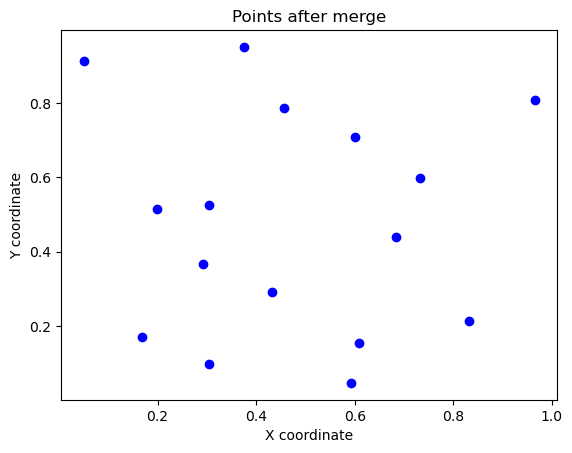

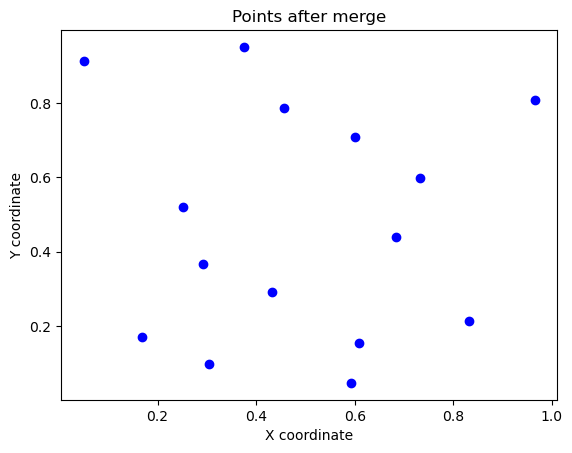

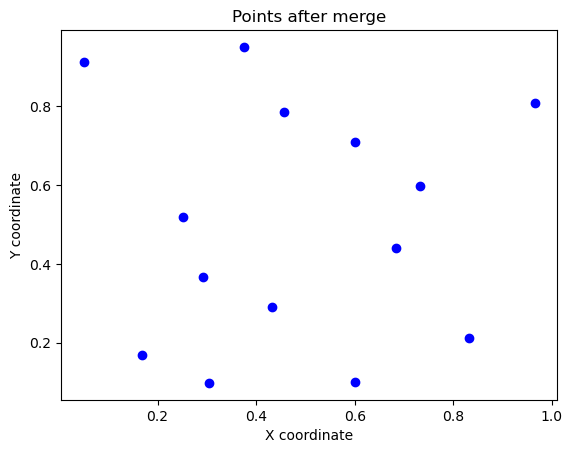

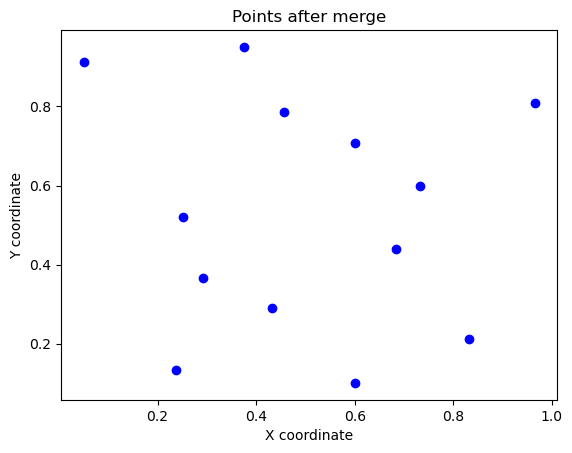

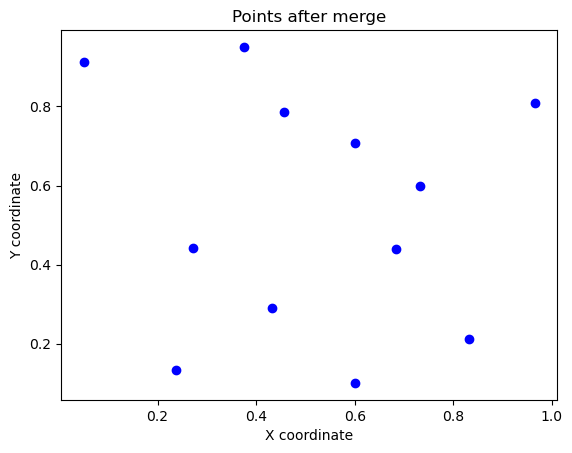

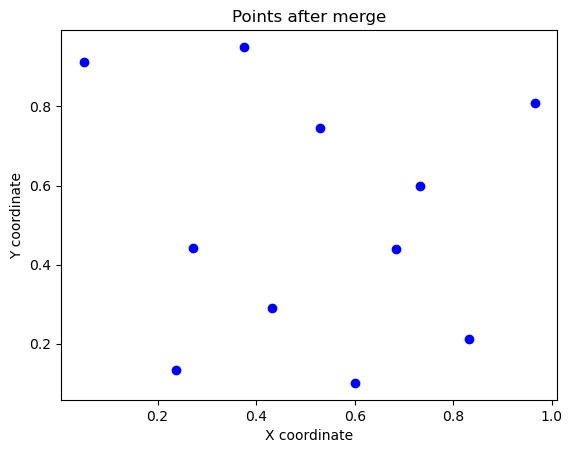

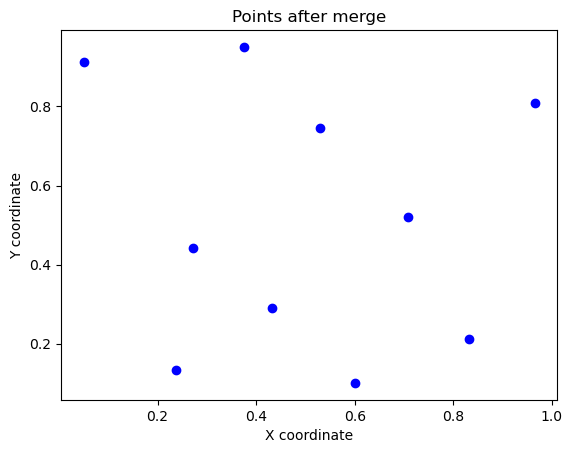

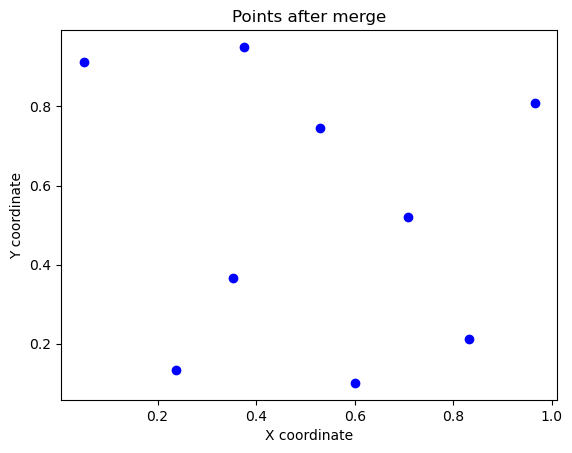

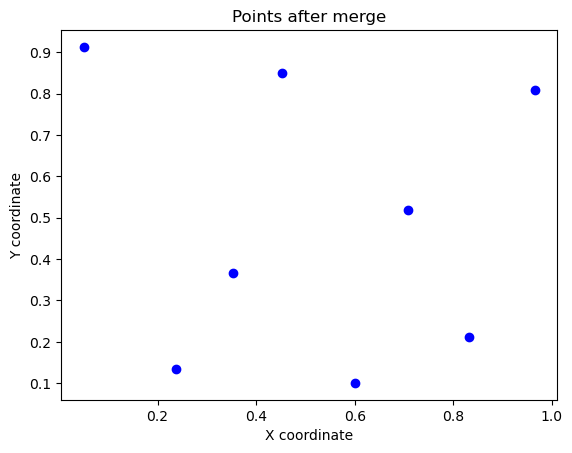

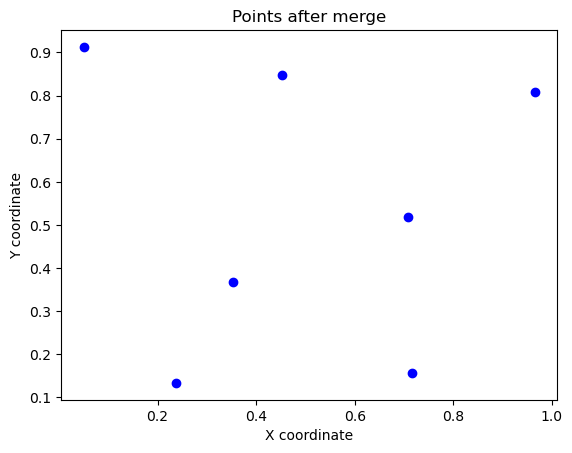

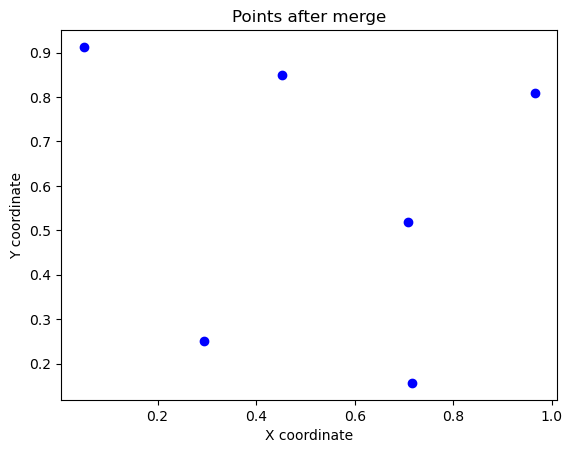

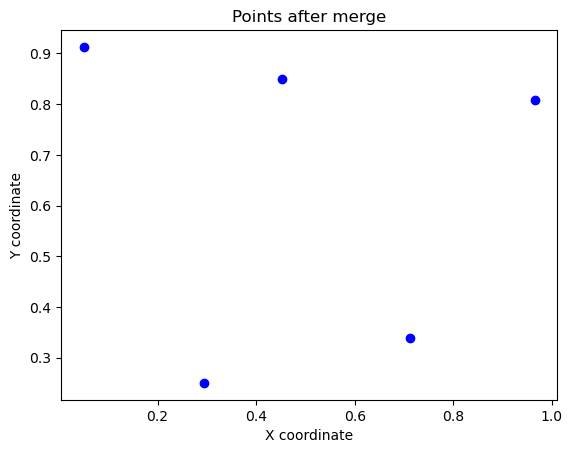

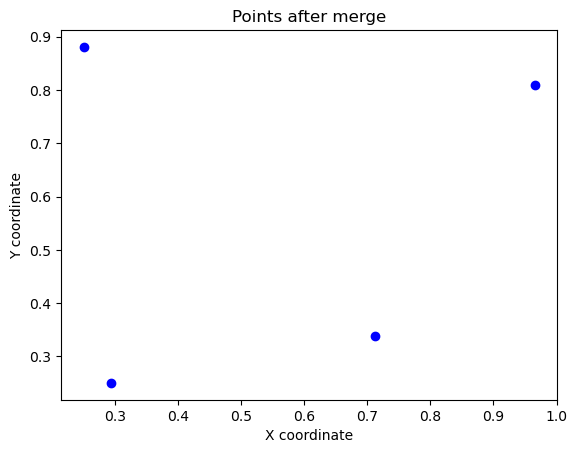

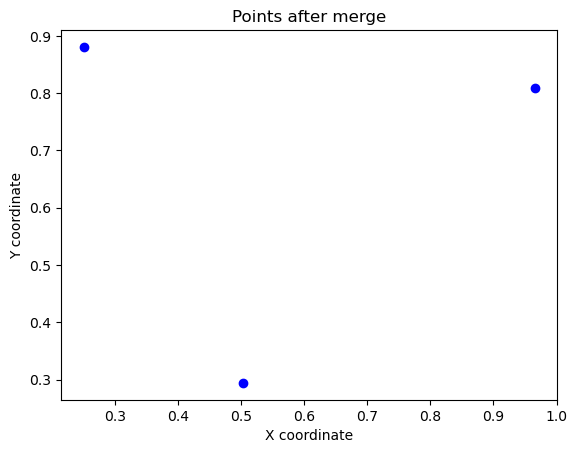

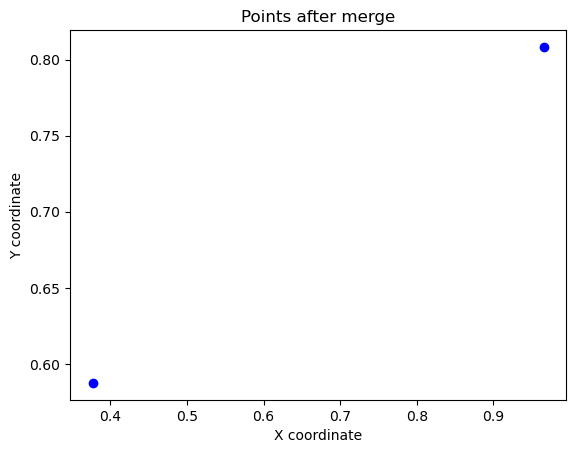

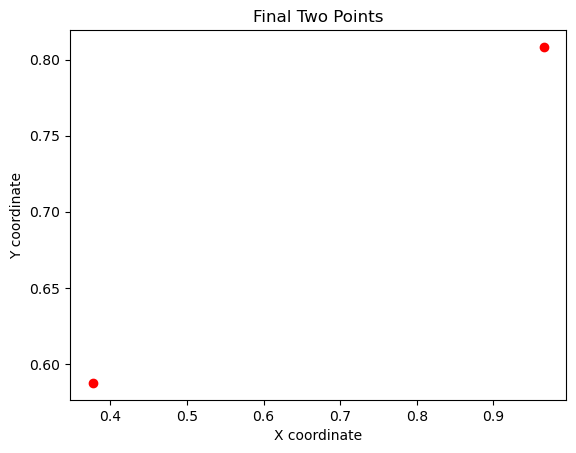

The final two points are:
[[0.96563203 0.80839735]
 [0.37720792 0.58745213]]


In [345]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  
points = np.random.rand(20, 2)  


def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


plt.scatter(points[:, 0], points[:, 1], color='blue')
plt.title('Initial Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()


while len(points) > 2:
    
    min_distance = np.inf
    closest_pair = (None, None)
    
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = euclidean_distance(points[i], points[j])
            if distance < min_distance:
                min_distance = distance
                closest_pair = (i, j)
    
    
    point1, point2 = points[closest_pair[0]], points[closest_pair[1]]
    average_point = (point1 + point2) / 2.0
    
    points = np.vstack([points[:closest_pair[0]], points[closest_pair[0]+1:closest_pair[1]], points[closest_pair[1]+1:], average_point])
    
    
    plt.scatter(points[:, 0], points[:, 1], color='blue')
    plt.title('Points after merge')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.show()

plt.scatter(points[:, 0], points[:, 1], color='red')
plt.title('Final Two Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

print("The final two points are:")
print(points)


# Exercicio 3

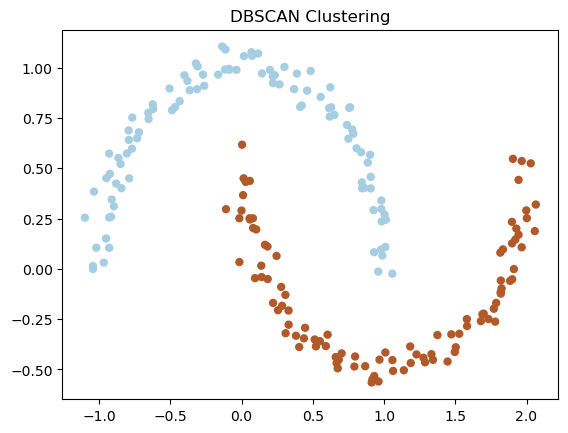

In [343]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

eps = 0.2
min_samples = 5

def dbscan(X, eps, min_samples):
    neigh = NearestNeighbors(radius=eps)
    neigh.fit(X)
    neighborhoods = neigh.radius_neighbors(X, return_distance=False)

    core_samples = np.array([len(neighbors) >= min_samples for neighbors in neighborhoods])
    core_indices = np.where(core_samples)[0]
    
    labels = np.full(X.shape[0], -1)  
    cluster_id = 0
    
    for core_index in core_indices:
        if labels[core_index] == -1:  
            points_to_visit = {core_index}
            while points_to_visit:
                current_point = points_to_visit.pop()
                
                
                if core_samples[current_point]:
                    points_to_visit.update(neighbors for neighbors in neighborhoods[current_point]
                                           if labels[neighbors] == -1)
                
                labels[current_point] = cluster_id
            cluster_id += 1
            
    return labels

labels = dbscan(X, eps, min_samples)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired', marker='o', s=25)
plt.title('DBSCAN Clustering')
plt.show()
